In [1]:
from PIL import PcfFontFile

In [72]:
with open("ProFont_r400-22.pcf", "rb") as f:
    font = PcfFontFile.PcfFontFile(f)

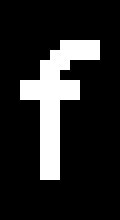

In [73]:
img = font.glyph[ord('f')][3]
img.resize((img.width*10, img.height*10))

In [79]:
img.width, img.height

(12, 22)

In [81]:
def bytes_for_char(c):
    img = font.glyph[c][3]
    result = []
    for x in range(img.width):
        byte = 0
        i = 0
        for y in range(img.height):
            bit = int(img.getpixel((x,y)) != 0)
            byte |= bit << i
            i += 1
            if i == 8:
                result.append(byte)
                byte=0
                i = 0
        if i != 0:
            result.append(byte)
    return result
result = bytes_for_char(ord('f'))

In [82]:
stride = 3
for i in range(0, len(result), stride):
    for byte in [result[j] for j in range(i, i+stride)]:
        for j in range(8):
            print('#' if bool(byte & 1 << j) else '.', end='')
    print()

........................
........................
........##..............
........##..............
......############......
.....#############......
....###.##..............
....##..##..............
....##..................
....##..................
........................
........................


In [83]:
chars = [bytes_for_char(c) for c in range(32, 128)]
chars = [byte for char in chars for byte in char]

In [84]:
len(bytes(chars))

3456

In [85]:
with open('font.raw', 'wb+') as f:
    f.write(bytes(chars))

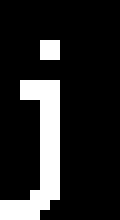

In [86]:
img = font.glyph[ord('j')][3]
img.resize((img.width*10, img.height*10))

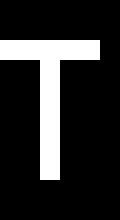

In [87]:
img = font.glyph[ord('T')][3]
img.resize((img.width*10, img.height*10))